<a href="https://colab.research.google.com/github/RoshanAkthar22/Classification/blob/main/Online_Shopper_Intention_MDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
from scipy.stats import shapiro,mannwhitneyu,chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image
from sklearn.tree import export_graphviz
import imblearn # dealing with imbalnce classes
import lightgbm
import hyperopt

import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


##Descriptive Statistics

In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.describe(include=['object','bool'])

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


In [ ]:
df.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [ ]:
df.kurtosis()

Administrative               4.701146
Administrative_Duration     50.556739
Informational               26.932266
Informational_Duration      76.316853
ProductRelated              31.211707
ProductRelated_Duration    137.174164
BounceRates                  7.723159
ExitRates                    4.017035
PageValues                  65.635694
SpecialDay                   9.913659
OperatingSystems            10.456843
Browser                     12.746733
Region                      -0.148680
TrafficType                  3.479711
Weekend                     -0.397404
Revenue                      1.646493
dtype: float64

Higher the kurtosis it's much more pointier compared to the normal distribution. Also higher the risks. Skewness messures the asymmatry of the distribution.


##EDA

#Numerical Columns

In [ ]:
num_col=['Administrative_Duration',
       'Informational_Duration', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51b81a8910>,
      dtype=object)

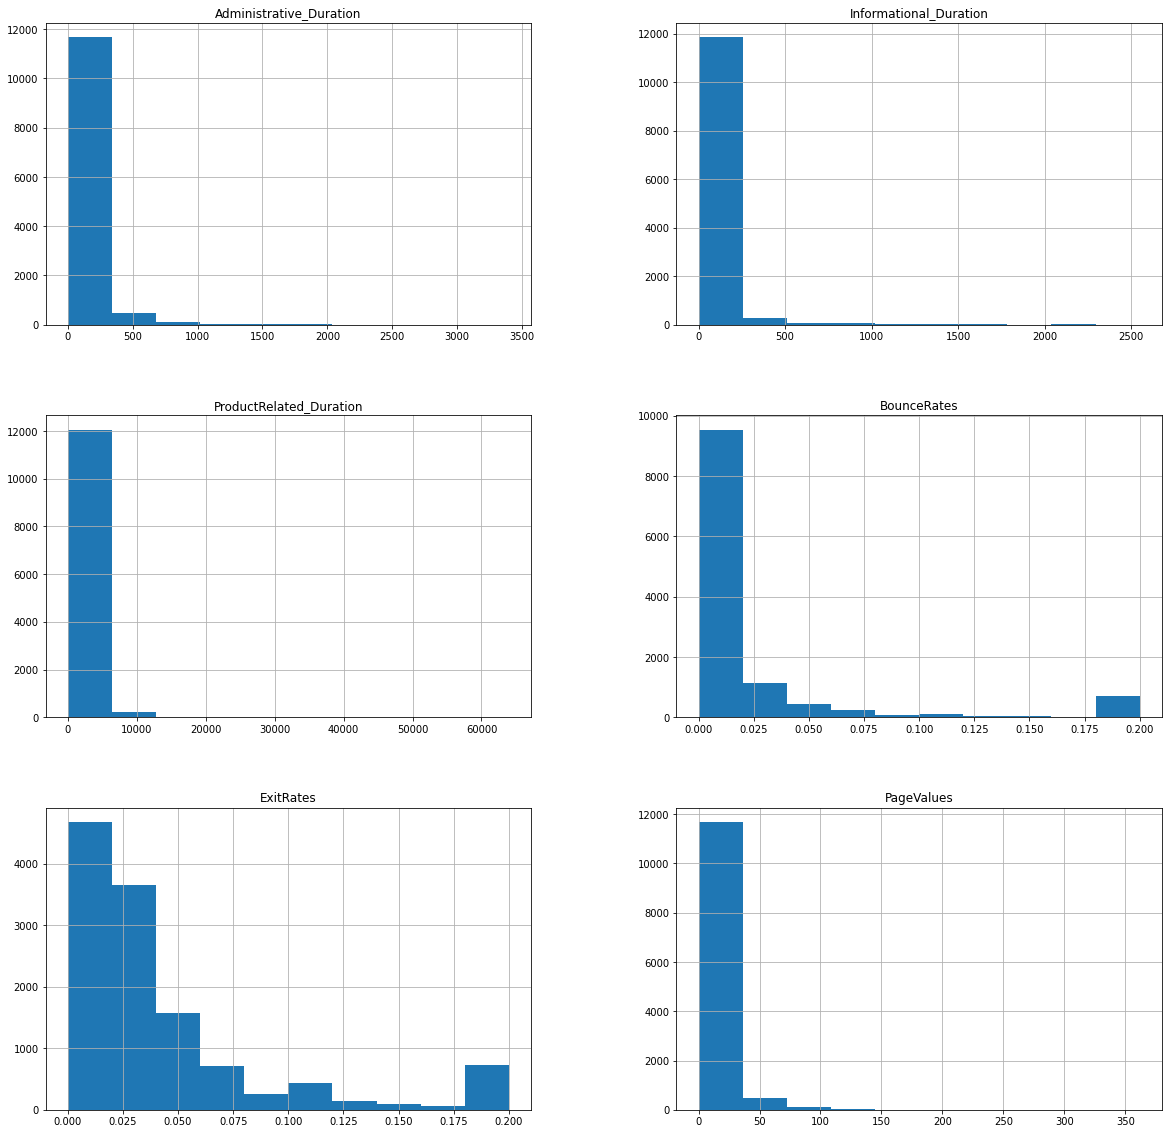

In [ ]:
df.hist(column=num_col,figsize=(20,20))
#if required we can decide the number of bins for the histogram passing bin parameter.


#Class Imbalance Check

Text(0, 0.5, '')

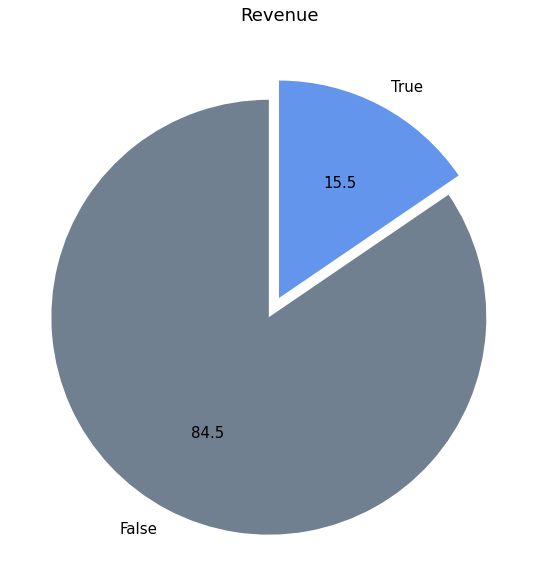

In [ ]:
plt.figure(figsize=(10,10))
df['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0),colors=['slategray','cornflowerblue'])
plt.title('Revenue', fontsize = 18)
plt.ylabel('')

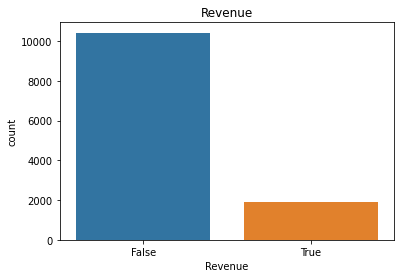

In [ ]:
plt.title('Revenue')
sns.countplot(df['Revenue'])

#Univariate Analysis


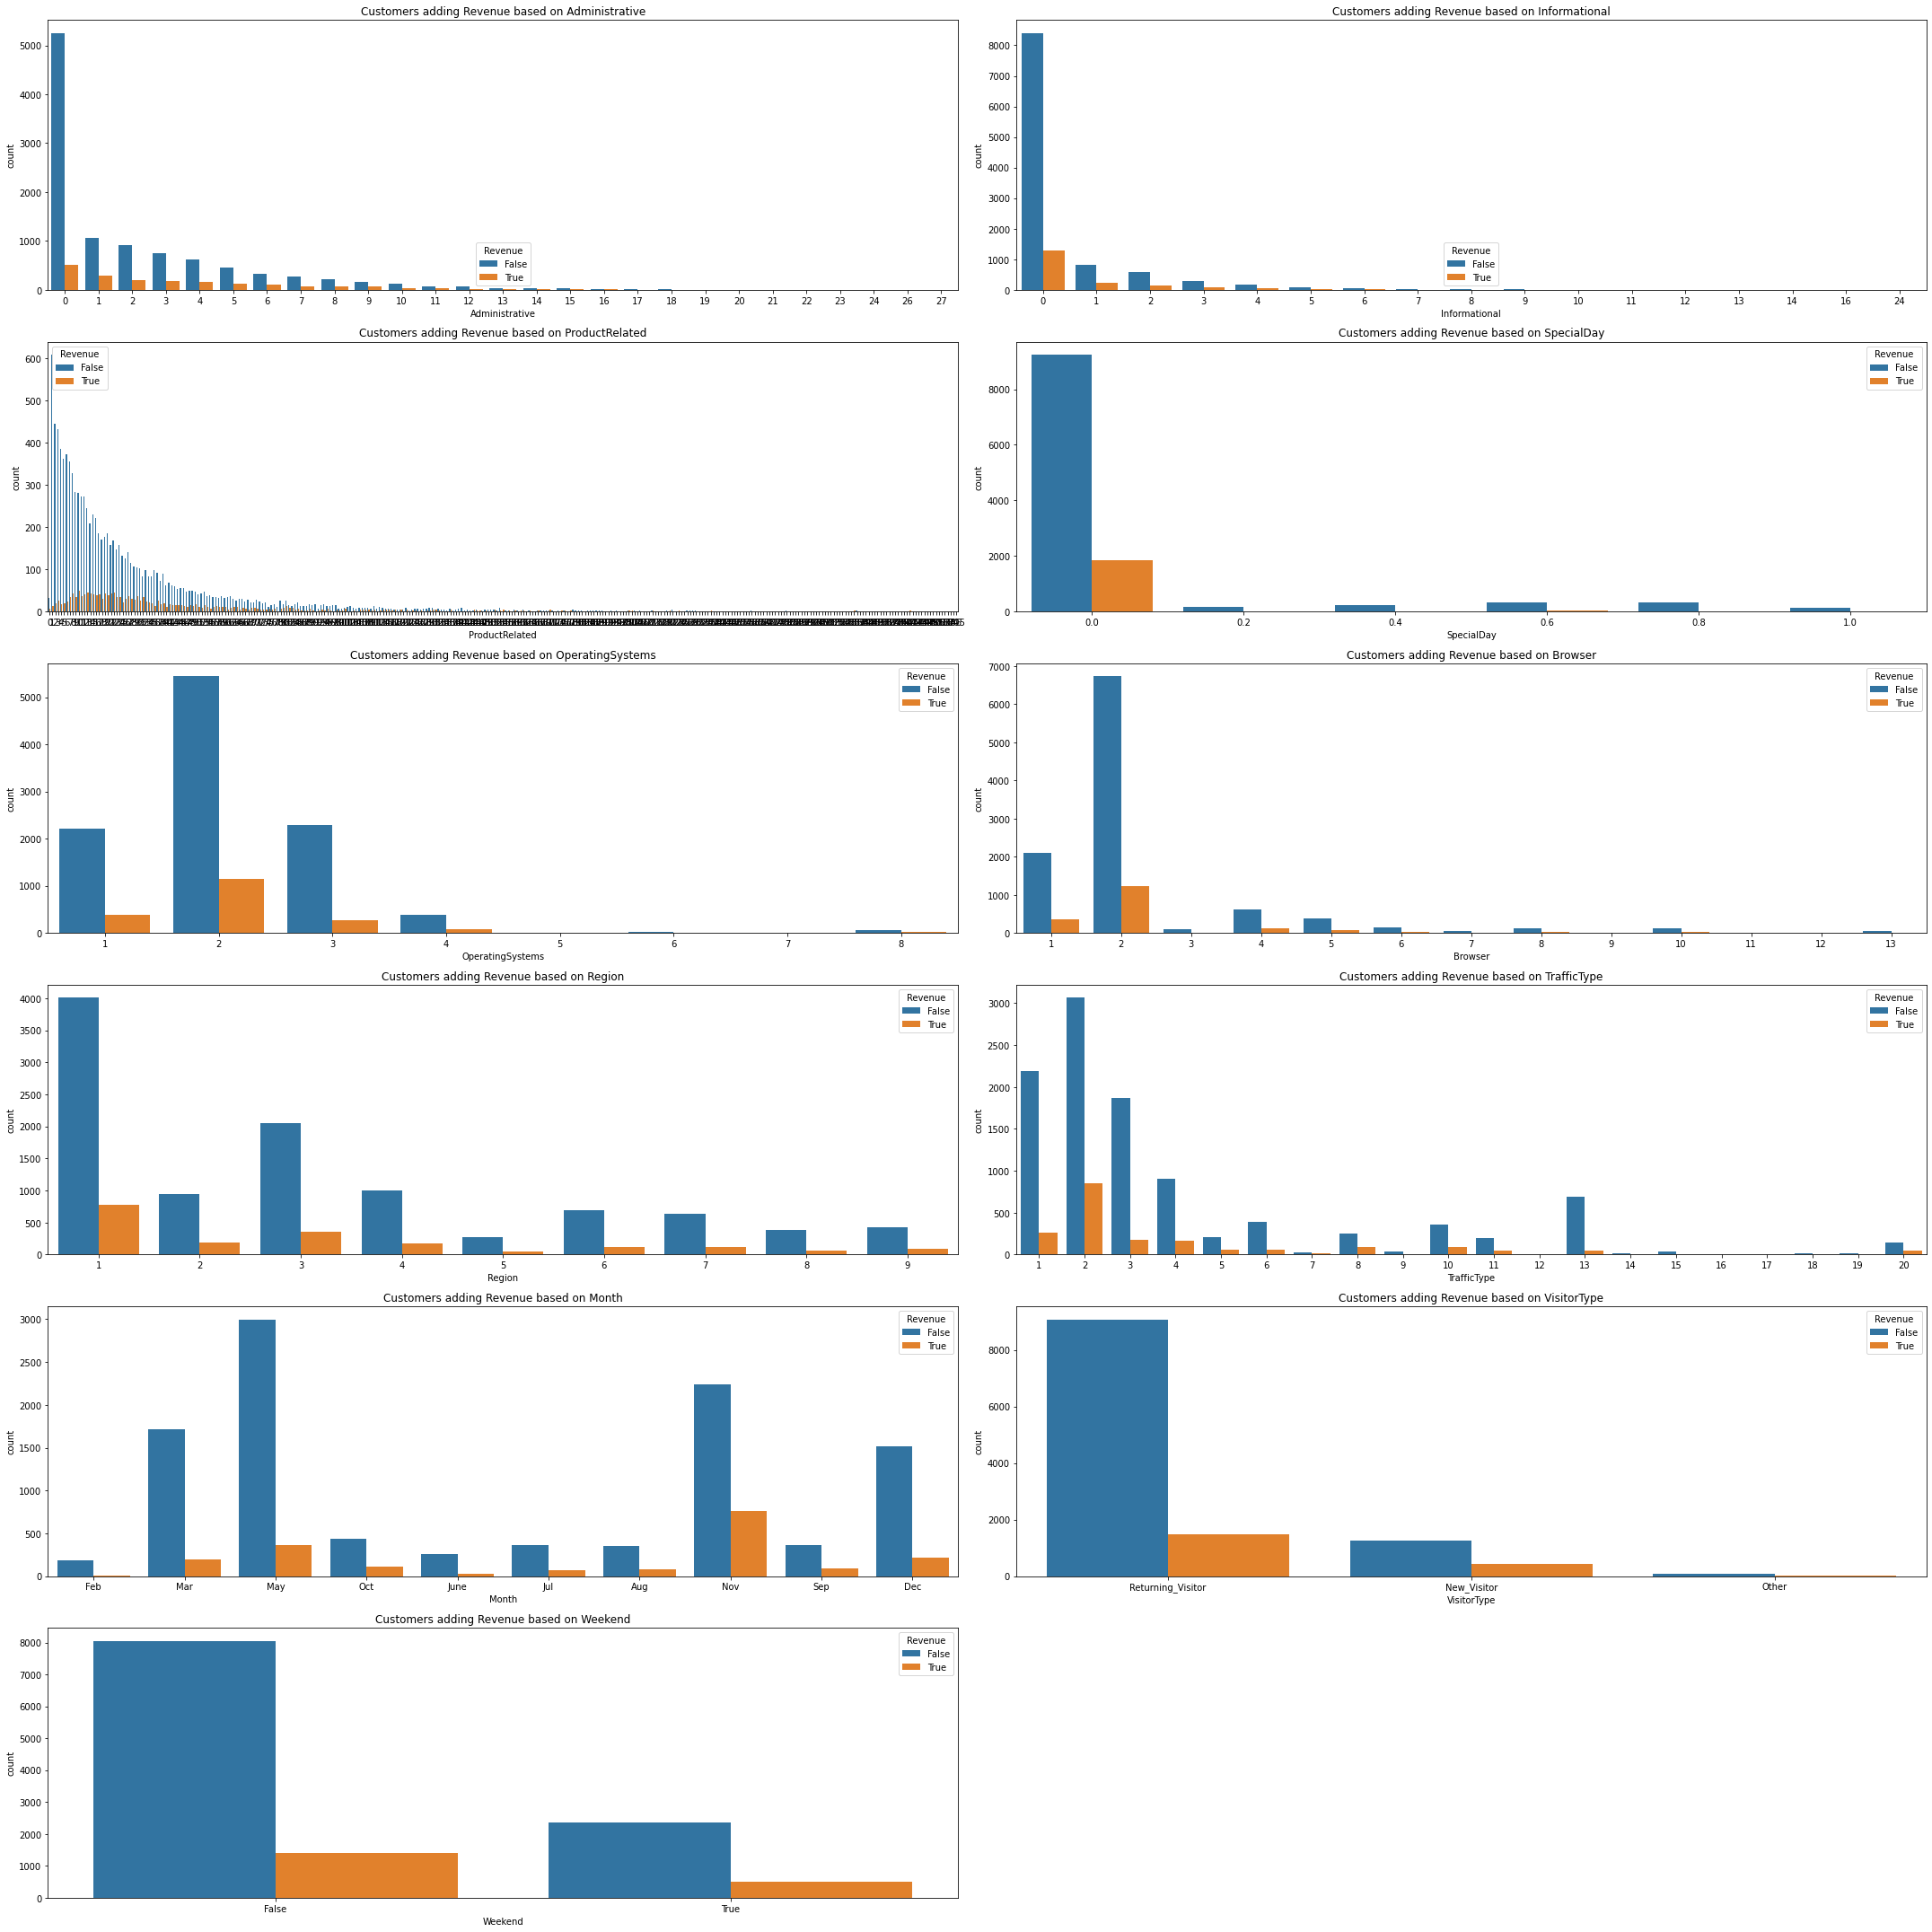

In [ ]:
column1l=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Month','VisitorType','Weekend']    
plt.figure(figsize=(30,30))
plot_number = 0
for i in column1l:
    plot_number = plot_number + 1
    ax = plt.subplot(6, 2, plot_number,adjustable='datalim')
    sns.countplot(df[i],hue=df['Revenue'])
    ax.set_title('Customers adding Revenue based on '+ i,fontdict=None)
    plt.tight_layout()

#Multivariate Analysis

In [ ]:
pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5433 sha256=c1596ca5ed6a30187f150f6fb062b47f78a3ce6814538b825c1487956867d75d
  Stored in directory: /root/.cache/pip/wheels/85/c7/3d/38784ece9ac882d3afdb852ea8cf867df942fe6c71da5c4360
Successfully built bubbly


In [ ]:
from plotly.offline import init_notebook_mode, iplot
from bubbly.bubbly import bubbleplot 

df['Revenue']=df['Revenue'].astype('object')
figure = bubbleplot(dataset=df, x_column='BounceRates', y_column='ExitRates', z_column='ProductRelated', size_column='ProductRelated',color_column='Revenue',  
    bubble_column='Revenue',x_title="BounceRates", y_title="ExitRates",z_title="ProductRelated", title='Bubble Plot', scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

In [ ]:
figure = bubbleplot(dataset=df, x_column='Administrative_Duration', y_column='Informational_Duration', z_column='ProductRelated_Duration',
    bubble_column='ProductRelated', size_column='ProductRelated',color_column='Revenue',  
    x_title="Administrative_Duration", y_title="Informational_Duration",z_title="ProductRelated_Duration", title='Bubble Plot', scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

In [ ]:
df2=df.copy()

#Statistical Tests

Categorical Data Vs Target

In [ ]:
cat_cols=['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']
#check weather Revenue is influenced by administrative column 
#H0=proportion of revenue accross all the administrative category is same
#H1=proportion of revenue at least in two administrative category is different
scol=[]
spval=[]
ss=[]
for n in cat_cols:
    scol.append(n)
    cp=chi2_contingency(pd.crosstab(df2[n],df2['Revenue']))[1]
    spval.append(round(cp,4))
    if (cp<0.05):
        #rejects Null
        ss.append('*')#signficant
    else:#Accepts Null
        ss.append('**')#not significant
pd.DataFrame({'Feature':scol,'P-Value':spval,'Significance':ss})

,Feature,P-Value,Significance
0,Administrative,0.0000,*
1,Informational,0.0000,*
2,ProductRelated,0.0000,*
3,Month,0.0000,*
4,OperatingSystems,0.0000,*
5,Browser,0.0061,*
6,Region,0.3214,**
7,TrafficType,0.0000,*
8,VisitorType,0.0000,*
9,Weekend,0.0013,*


In [ ]:
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']
from scipy.stats import levene

#print('Two-Sample-T-Test of ','\n')
tcol=[]
tpval=[]
ts=[]
for n in numerical_columns:
    tcol.append(n)
    #splitting into 2 groups(Revenue=True, Revenue=False)
    g1=df2[n][df['Revenue']==False]
    g2=df2[n][df['Revenue']==True]
    #Test for normality(Shapiro Test)
    #H0:Data is normal
    #H0:Data is not normal
    # if p<0.05---reject Null
    for b in [g1]:
        s,p=shapiro(b)
    for c in [g2]:
        s1,p1=shapiro(c)
    if (p>0.05 or p1>0.05):
        w,lp=levene(g1,g2)
    #If data dosen't pass normality or variance test, we do non-parametric Test(Mann Whitney U Test)
    if (p<=0.05 or p1<=0.05 or lp<=0.05):
        ms,mp=mannwhitneyu(g1,g2)
        #print('Mannwhitneyu P-Value: ',mp,'\n')
        tpval.append(round(mp,4))
        if (mp<0.05):
            ts.append('*')       #significat
        else:
            ts.append('**')      #not significant
pd.DataFrame({'Feature':tcol,'P-Value':tpval,'Significant':ts})

,Feature,P-Value,Significant
0,Administrative_Duration,0.0,*
1,Informational_Duration,0.0,*
2,ProductRelated_Duration,0.0,*
3,BounceRates,0.0,*
4,ExitRates,0.0,*
5,PageValues,0.0,*


In [ ]:
num_col=['Administrative_Duration',
       'Informational_Duration', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

In [ ]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in num_col:
    data_mean, data_std = mean(df2[i]), std(df2[i])
# identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i,': \n')
# identify outliers
    outliers = [x for x in df2[i] if x < lower or x > upper]
    
    num_out=len(outliers)
    print('Identified outliers: %d' % num_out)
    outliers_removed = [x for x in df2[i] if x >= lower and x <= upper]
    num_nout=len(outliers_removed)
    print('Non-outlier observations: %d' % num_nout)
    outlier_percent=(num_out/(num_out+num_nout))*100
    print('Percent of outlers:',outlier_percent ,'\n')
    out_per.append(outlier_percent)

Administrative_Duration : 

Identified outliers: 232
Non-outlier observations: 12098
Percent of outlers: 1.8815896188158963 

Informational_Duration : 

Identified outliers: 230
Non-outlier observations: 12100
Percent of outlers: 1.8653690186536902 

ProductRelated_Duration : 

Identified outliers: 219
Non-outlier observations: 12111
Percent of outlers: 1.7761557177615572 

BounceRates : 

Identified outliers: 708
Non-outlier observations: 11622
Percent of outlers: 5.742092457420925 

ExitRates : 

Identified outliers: 713
Non-outlier observations: 11617
Percent of outlers: 5.78264395782644 

PageValues : 

Identified outliers: 259
Non-outlier observations: 12071
Percent of outlers: 2.1005677210056772 



In [ ]:
Outliers=pd.DataFrame({'Feature':num_col,'% Of Outliers':out_per})
outlier_sorted=Outliers.sort_values('% Of Outliers',ascending=False)
outlier_sorted

,Feature,% Of Outliers
4,ExitRates,5.782644
3,BounceRates,5.742092
5,PageValues,2.100568
0,Administrative_Duration,1.881590
1,Informational_Duration,1.865369
2,ProductRelated_Duration,1.776156


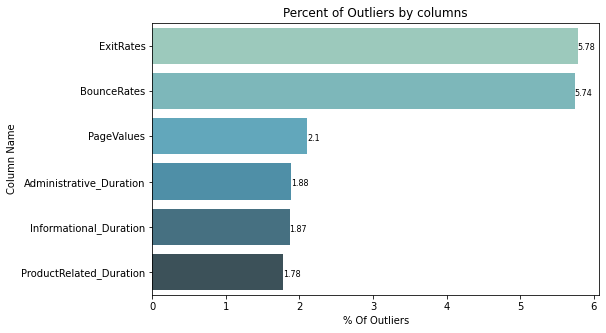

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y=outlier_sorted['Feature'],x=outlier_sorted['% Of Outliers'],palette='GnBu_d')
plt.title('Percent of Outliers by columns')
plt.ylabel('Column Name')
for i, v in enumerate(list(outlier_sorted['% Of Outliers'])):
    plt.text(v,i-(-0.1),round(list(outlier_sorted['% Of Outliers'])[i],2),fontsize=8)
    
    #plt.savefig('Outliers.jpeg',bbox_inches='tight',dpi=150)

In [ ]:
df_copy=df2.copy()
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51a8abd850>,
      dtype=object)

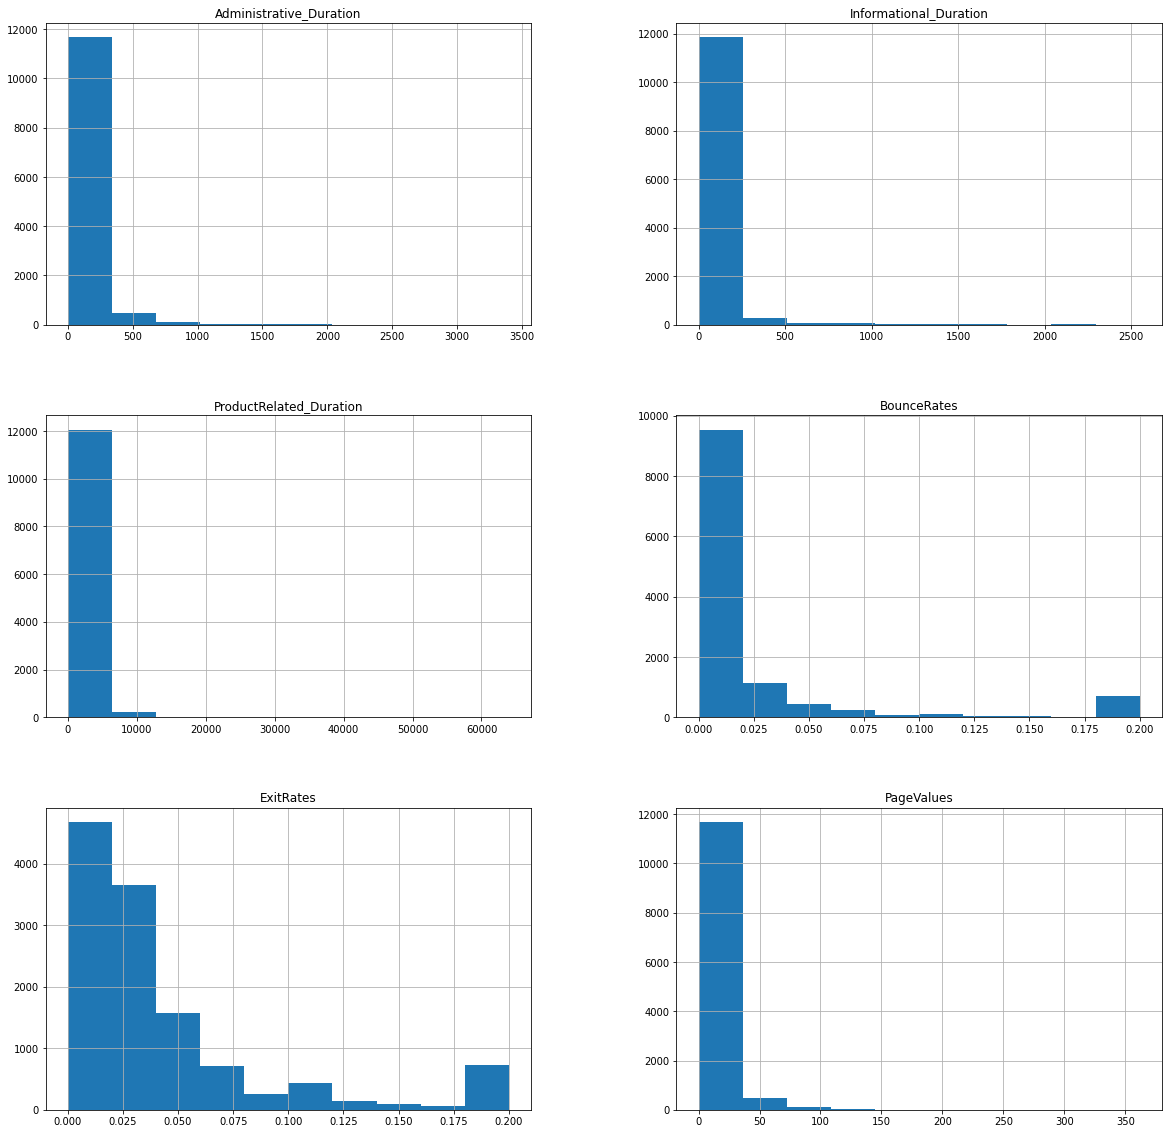

In [ ]:
df_copy.hist(column=num_col,figsize=(20,20))

In [ ]:
df_copy['Administrative_Duration']=1/(df['Administrative_Duration']+1)
df_copy['Informational_Duration'],i = st.boxcox(df['Informational_Duration']+1)
df_copy['ProductRelated_Duration'],pd = st.boxcox(df['ProductRelated_Duration']+1)
df_copy['BounceRates']= df['BounceRates']**0.2 
df_copy['ExitRates']=df['ExitRates']**0.2 
df_copy['PageValues'],p = st.boxcox(df['PageValues']+1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51aabbd550>,
      dtype=object)

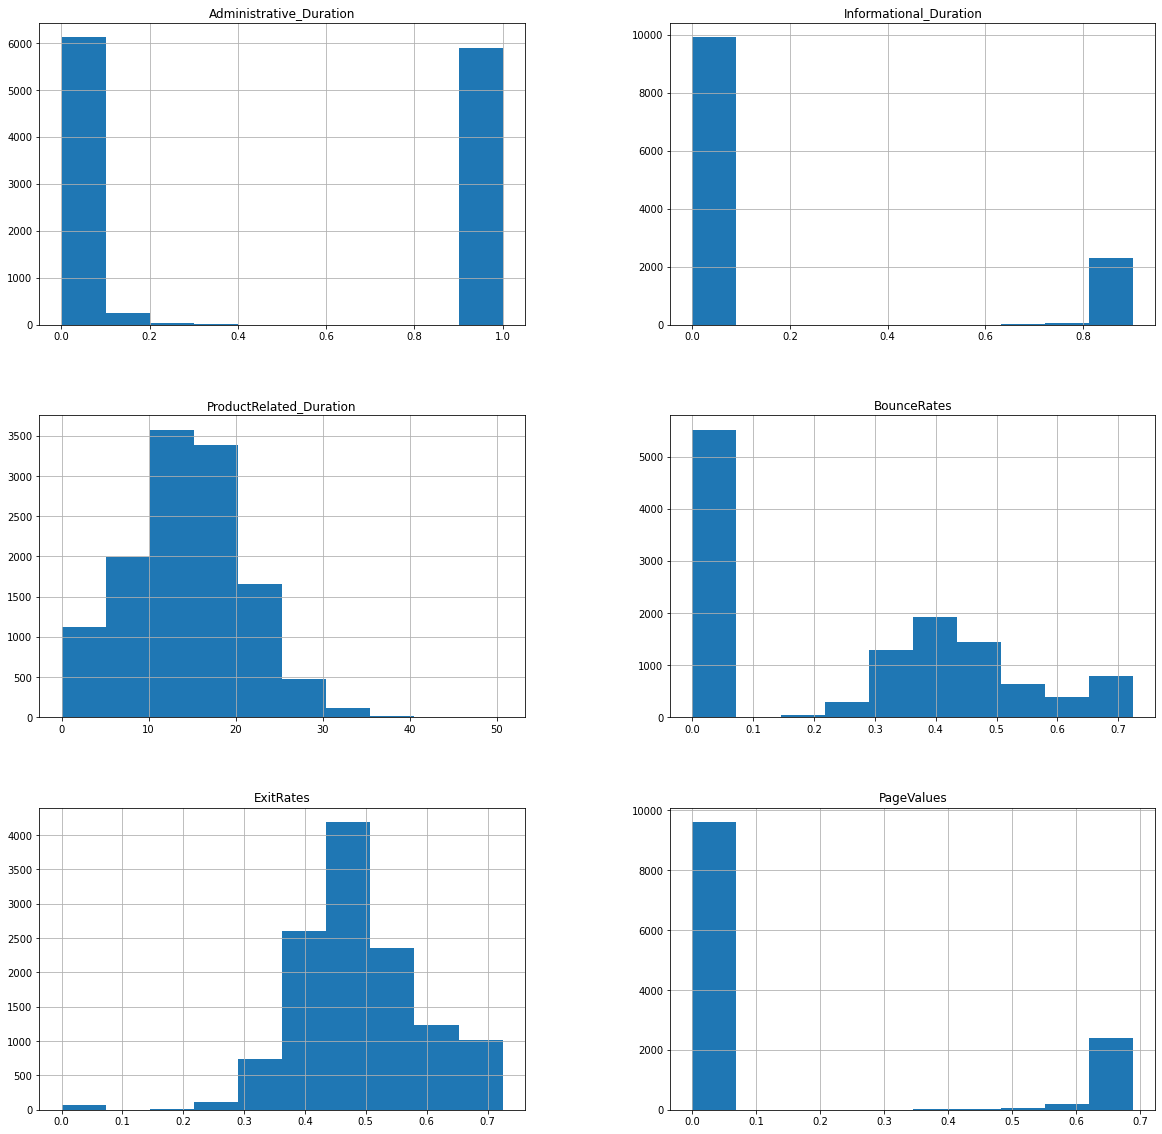

In [ ]:
df_copy.hist(column=num_col,figsize=(20,20))

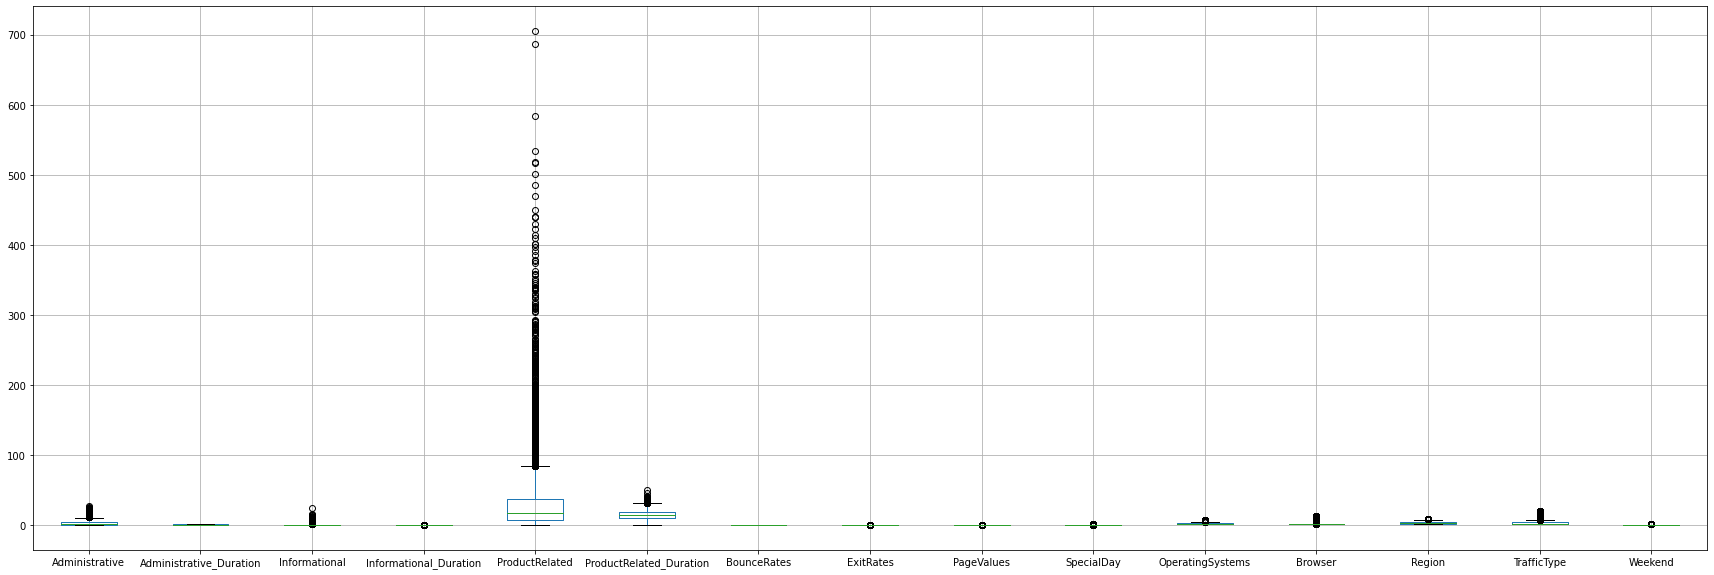

In [ ]:
plt.figure(figsize=(30,10))
df_copy.boxplot()

In [ ]:
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_copy['Weekend'] = le.fit_transform(df_copy['Weekend'])
df_copy['Revenue'] = le.fit_transform(df_copy['Revenue'])
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [ ]:
df_copy['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [ ]:
top_10_traffic = [x for x in df_copy['TrafficType'].value_counts().sort_values(ascending=False).head(10).index]
top_10_traffic

[2, 1, 3, 4, 13, 10, 6, 8, 5, 11]

In [ ]:
def one_hot_top_x(dataframe,variable,top_x_labels):
    for label in top_x_labels:
        df_copy[variable+'_'+str(label)] = np.where(df_copy[variable]==label,1,0)

In [ ]:
one_hot_top_x(df_copy,'TrafficType',top_10_traffic)
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_10,TrafficType_6,TrafficType_8,TrafficType_5,TrafficType_11
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
top_8_browser = [x for x in df_copy['Browser'].value_counts().sort_values(ascending=False).head(8).index]
top_8_browser

[2, 1, 4, 5, 6, 10, 8, 3]

In [ ]:
one_hot_top_x(df_copy,'Browser',top_8_browser)
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_10,TrafficType_6,TrafficType_8,TrafficType_5,TrafficType_11,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
top_8_month = [x for x in df_copy['Month'].value_counts().sort_values(ascending=False).head(8).index]
top_8_month

['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul']

In [ ]:
one_hot_top_x(df_copy,'Month',top_8_month)
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_10,TrafficType_6,TrafficType_8,TrafficType_5,TrafficType_11,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Aug,Month_Jul
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
top_5_os = [x for x in df_copy['OperatingSystems'].value_counts().sort_values(ascending=False).head(5).index]
top_5_os

[2, 1, 3, 4, 8]

In [ ]:
one_hot_top_x(df_copy,'OperatingSystems',top_5_os)
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_10,TrafficType_6,TrafficType_8,TrafficType_5,TrafficType_11,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Aug,Month_Jul,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,OperatingSystems_8
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
labels = [x for x in df_copy['VisitorType'].value_counts().sort_values(ascending=False).head().index]
labels

def one_hot_encode(dataframe,variable,labels):
    for label in labels:
        df_copy[variable+'_'+str(label)] = np.where(df_copy[variable]==label,1,0)
one_hot_encode(df_copy,'VisitorType',labels)

In [ ]:
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_10,TrafficType_6,TrafficType_8,TrafficType_5,TrafficType_11,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Aug,Month_Jul,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,OperatingSystems_8,VisitorType_Returning_Visitor,VisitorType_New_Visitor,VisitorType_Other
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
df_vif=df_copy[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']]
# df['column name'] = df['column name'].astype(np.int64)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df_vif


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative_Duration  12330 non-null  float64
 1   Informational_Duration   12330 non-null  float64
 2   ProductRelated_Duration  12330 non-null  float64
 3   BounceRates              12330 non-null  float64
 4   ExitRates                12330 non-null  float64
 5   PageValues               12330 non-null  float64
dtypes: float64(6)
memory usage: 578.1 KB


In [ ]:
calc_vif(X)

,variables,VIF
0,Administrative_Duration,2.770116
1,Informational_Duration,1.508170
2,ProductRelated_Duration,4.816875
3,BounceRates,2.746530
4,ExitRates,8.894651
5,PageValues,1.527322


In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
  
# the independent variables set
X = df_vif
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                   feature       VIF
0  Administrative_Duration  2.770116
1   Informational_Duration  1.508170
2  ProductRelated_Duration  4.816875
3              BounceRates  2.746530
4                ExitRates  8.894651
5               PageValues  1.527322


In [ ]:
df_copy.shape

(12330, 52)

In [ ]:
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_10,TrafficType_6,TrafficType_8,TrafficType_5,TrafficType_11,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Aug,Month_Jul,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,OperatingSystems_8,VisitorType_Returning_Visitor,VisitorType_New_Visitor,VisitorType_Other
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
df_final = df_copy.drop(['Month','OperatingSystems','Browser','TrafficType'],axis=1)
df_final.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,VisitorType,Weekend,Revenue,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_10,TrafficType_6,TrafficType_8,TrafficType_5,TrafficType_11,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Aug,Month_Jul,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,OperatingSystems_8,VisitorType_Returning_Visitor,VisitorType_New_Visitor,VisitorType_Other
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,1,Returning_Visitor,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,1,Returning_Visitor,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,9,Returning_Visitor,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,2,Returning_Visitor,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,1,Returning_Visitor,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
df_final.drop('VisitorType',axis=1,inplace=True)
df_final.drop('Region',axis=1,inplace=True)
df_final.shape

(12330, 46)

In [ ]:
df_final.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_10,TrafficType_6,TrafficType_8,TrafficType_5,TrafficType_11,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Aug,Month_Jul,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,OperatingSystems_8,VisitorType_Returning_Visitor,VisitorType_New_Visitor,VisitorType_Other
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


## Factor Analyzing

In [ ]:
X=df_final.drop(columns=['Revenue'],axis=1)
y=df_final['Revenue']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs_fa=ss.fit_transform(X)

In [ ]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_10,TrafficType_6,TrafficType_8,TrafficType_5,TrafficType_11,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Aug,Month_Jul,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,OperatingSystems_8,VisitorType_Returning_Visitor,VisitorType_New_Visitor,VisitorType_Other
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
Xs_fa

array([[-0.69699296,  1.04166244, -0.3964779 , ...,  0.41062101,
        -0.39908696, -0.08331632],
       [-0.69699296,  1.04166244, -0.3964779 , ...,  0.41062101,
        -0.39908696, -0.08331632],
       [-0.69699296,  1.04166244, -0.3964779 , ...,  0.41062101,
        -0.39908696, -0.08331632],
       ...,
       [-0.69699296,  1.04166244, -0.3964779 , ...,  0.41062101,
        -0.39908696, -0.08331632],
       [ 0.50722805, -0.98009966, -0.3964779 , ...,  0.41062101,
        -0.39908696, -0.08331632],
       [-0.69699296,  1.04166244, -0.3964779 , ..., -2.43533571,
         2.50571955, -0.08331632]])

In [ ]:
pip install factor_analyzer

     |████████████████████████████████| 41 kB 340 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=c25a342ae6682856a4fdc796e059836af234250941669719ad7250a4a7f75cba
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

Bartlett’s test

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Xs_fa)
chi_square_value, p_value

(655978.1023300732, 0.0)

Kaiser-Meyer-Olkin (KMO) Test

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Xs_fa)
kmo_model

0.18441648197538857

#PCA

In [ ]:
X=df_final.drop(columns=['Revenue'],axis=1)
y=df_final['Revenue']


from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs_pca=ss.fit_transform(X)


from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(Xs_pca)

In [ ]:
# Weights or Loadings of Principal Components
# Principal Components Weights (Eigenvectors)
# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,0.345557,-0.343096,0.282005,0.293526,0.318837,0.368365,-0.172632,-0.337968,0.252936,-0.105377,0.034223,0.185980,-0.071338,-0.118538,-0.007954,-0.058483,0.005041,-0.013199,0.028998,0.027522,-0.016663,0.080806,-0.079853,0.005297,-0.000241,-0.008638,0.007533,-0.036862,-0.031282,-0.095194,0.094512,-0.043175,0.008253,0.051445,0.040725,0.026462,-0.000928,0.109393,-0.079883,-0.049042,-0.004265,-0.013666,-0.093282,0.099680,-0.018595
1,-0.006105,-0.055645,-0.062573,-0.060536,-0.128345,-0.090894,-0.186803,-0.138549,-0.009019,-0.117234,0.067382,0.136912,-0.119063,0.021512,-0.033943,-0.173915,0.010770,-0.060622,0.102276,0.081958,0.005239,-0.376367,0.419756,0.007267,-0.003073,-0.017400,-0.001737,0.075351,0.004962,-0.121862,0.019844,0.015690,0.080857,0.054270,0.017768,0.006650,-0.016098,-0.250074,0.409916,-0.158569,0.082213,0.076695,-0.308099,0.295837,0.077523
2,0.132184,-0.040711,0.218846,0.207941,0.189871,0.142625,0.266639,0.125566,0.067342,0.058741,0.036655,-0.102364,0.049865,0.111112,0.041984,0.020416,0.034224,-0.014759,-0.082818,-0.099698,-0.012808,-0.221098,0.334119,-0.081545,-0.031629,-0.000681,-0.018875,0.052892,0.005385,0.056558,0.052795,-0.048065,-0.083494,-0.013958,-0.042916,0.003729,0.022976,-0.285176,0.322160,0.012575,0.067241,-0.091430,0.391264,-0.375246,-0.100310
3,0.011581,0.007090,0.063159,0.043869,-0.007853,-0.049295,0.143798,0.101619,-0.077787,-0.267263,0.081055,0.053228,0.046939,-0.106651,-0.242210,0.131395,0.124484,-0.086895,0.092371,-0.065981,0.065627,0.237815,-0.049558,-0.238762,-0.161355,-0.094954,-0.108675,0.007882,0.078389,-0.394303,0.237168,0.069638,0.180947,-0.022821,-0.010778,-0.026107,0.005731,-0.328936,-0.018447,0.402063,-0.019752,0.157842,-0.047110,0.009166,0.161923
4,0.074979,-0.106604,0.047656,0.056968,-0.059224,-0.047767,0.026842,-0.032755,0.008613,0.290355,0.089617,-0.036945,-0.312386,0.011299,0.248942,0.181042,-0.110841,0.082369,0.003720,0.132438,0.074709,0.162958,0.002353,-0.186549,-0.134517,-0.078044,-0.069266,0.016290,0.104281,0.389682,-0.130409,-0.254215,-0.114127,0.026940,0.040228,0.012579,0.003517,-0.295948,0.018212,0.350822,0.002112,-0.034662,-0.189705,0.203064,-0.039262


In [ ]:
df_pca_loadings.shape

(45, 45)

In [ ]:
pca.explained_variance_ratio_

array([8.81288529e-02, 6.72609832e-02, 5.85923116e-02, 4.44538335e-02,
       4.28332259e-02, 3.82635160e-02, 3.25910352e-02, 2.98513779e-02,
       2.92154690e-02, 2.83940403e-02, 2.79575215e-02, 2.56817207e-02,
       2.52466588e-02, 2.49555508e-02, 2.42306055e-02, 2.38893107e-02,
       2.34276162e-02, 2.33546738e-02, 2.30262912e-02, 2.26425178e-02,
       2.25170154e-02, 2.22046070e-02, 2.19677138e-02, 2.13714231e-02,
       2.08358362e-02, 2.04998524e-02, 1.88548733e-02, 1.82036487e-02,
       1.77320362e-02, 1.67749703e-02, 1.65473216e-02, 1.57471801e-02,
       1.52082012e-02, 1.13905695e-02, 8.02339566e-03, 7.68252211e-03,
       5.74869714e-03, 4.85913111e-03, 4.48035035e-03, 3.24487683e-03,
       1.02246015e-03, 7.15063949e-04, 2.81305969e-04, 8.98353922e-05,
       1.73803517e-32])

In [ ]:
Xc=Xs_pca.astype(float)
cov_matrix = np.cov(X_pca.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 3.96612005e+00  7.72266417e-16 -2.42053653e-16 ... -1.00855689e-17
   2.88159111e-18 -1.20482203e-31]
 [ 7.72266417e-16  3.02698974e+00  6.06286769e-16 ... -1.50202937e-17
  -5.62810764e-20 -2.91767842e-32]
 [-2.42053653e-16  6.06286769e-16  2.63686788e+00 ... -5.72716233e-18
  -7.96940041e-18  2.22664932e-32]
 ...
 [-1.00855689e-17 -1.50202937e-17 -5.72716233e-18 ...  1.26597954e-02
  -3.02567066e-18 -5.91853627e-34]
 [ 2.88159111e-18 -5.62810764e-20 -7.96940041e-18 ... -3.02567066e-18
   4.04292054e-03 -6.70584156e-34]
 [-1.20482203e-31 -2.91767842e-32  2.22664932e-32 ... -5.91853627e-34
  -6.70584156e-34  7.78693450e-31]]


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-1.00000000e+00 -8.22320835e-16 -1.82097618e-16 ...  4.87946741e-17
   6.00729765e-17  1.25812849e-18]
 [-4.36230651e-16  1.00000000e+00  1.62534913e-15 ...  9.26981063e-18
   1.35313665e-16 -1.94797040e-16]
 [ 1.26119340e-16  1.71949486e-15 -1.00000000e+00 ...  6.87203514e-17
  -1.14868709e-16  3.13906019e-17]
 ...
 [ 2.28133079e-18 -2.89892711e-16  2.16729100e-17 ... -1.16194733e-16
  -9.18971908e-17  1.93336333e-17]
 [-6.49019005e-19  1.18993816e-16 -1.44612156e-17 ... -5.34381151e-17
  -1.75072362e-16  4.10388877e-17]
 [ 2.70814052e-32 -6.02634784e-30  1.43070317e-30 ...  1.45837507e-16
   1.09150276e-16 -3.35216618e-17]]

 Eigen Values 
 [3.96612005e+00 3.02698974e+00 2.63686788e+00 2.00058476e+00
 1.92765151e+00 1.72199788e+00 4.60144387e-02 3.21804876e-02
 1.26597954e-02 4.04292054e-03 1.46031301e-01 2.01632119e-01
 2.18678635e-01 2.58712354e-01 3.45741535e-01 3.61082090e-01
 7.80848307e-16 1.46671554e+00 5.12617202e-01 1.34342096e+00
 1.31480274e+00 6.84424565

In [ ]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  8.81288529  15.53898361  21.39821477  25.84359812  30.12692071
  33.95327231  37.21237583  40.19751362  43.11906052  45.95846455
  48.7542167   51.32238877  53.84705465  56.34260972  58.76567028
  61.15460134  63.49736296  65.83283035  68.13545947  70.39971124
  72.65141278  74.87187349  77.06864486  79.20578718  81.2893708
  83.33935604  85.22484337  87.04520824  88.81841186  90.49590889
  92.15064105  93.72535906  95.24617919  96.38523613  97.1875757
  97.95582791  98.53069763  99.01661074  99.46464577  99.78913345
  99.89137947  99.96288586  99.99101646 100.         100.        ]


#scree plot

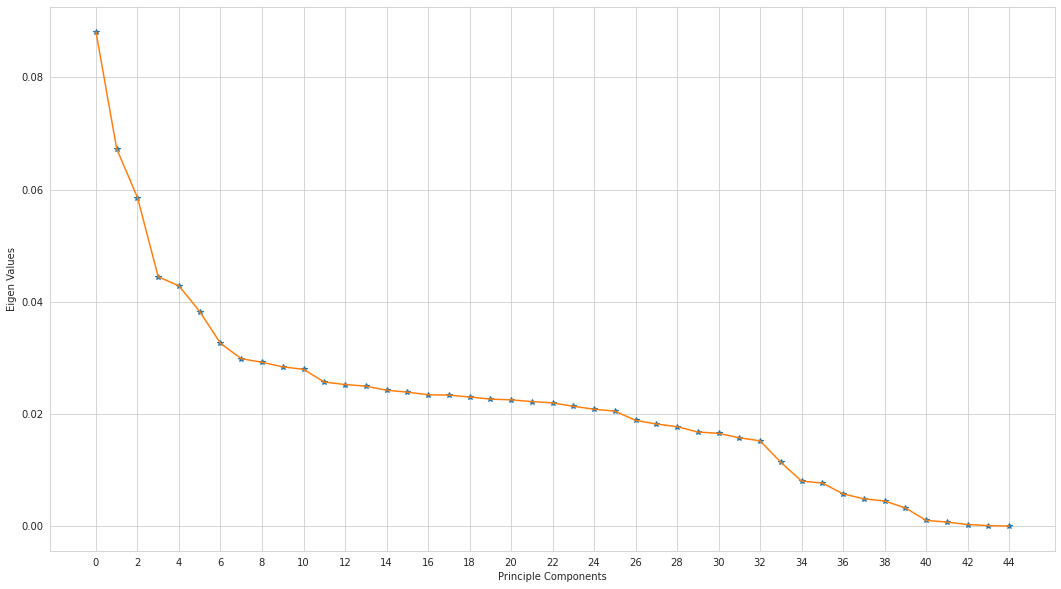

In [ ]:
sns.set_style(style='whitegrid', rc=None)
plt.figure(figsize=(18 , 10))

plt.plot(pca.explained_variance_ratio_,'*')
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(0,45,2))
plt.xlabel('Principle Components')
plt.ylabel('Eigen Values')
plt.show()

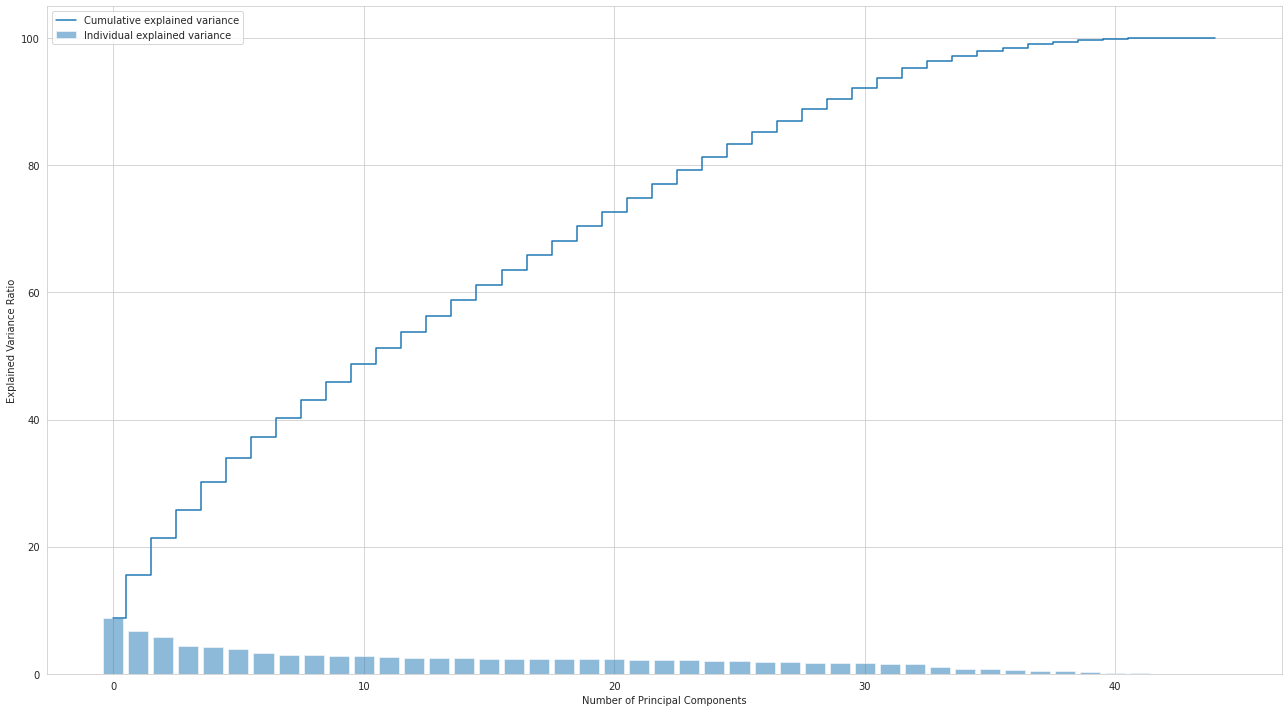

In [ ]:
plt.figure(figsize=(18 , 10))
plt.bar(range(45), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(45), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

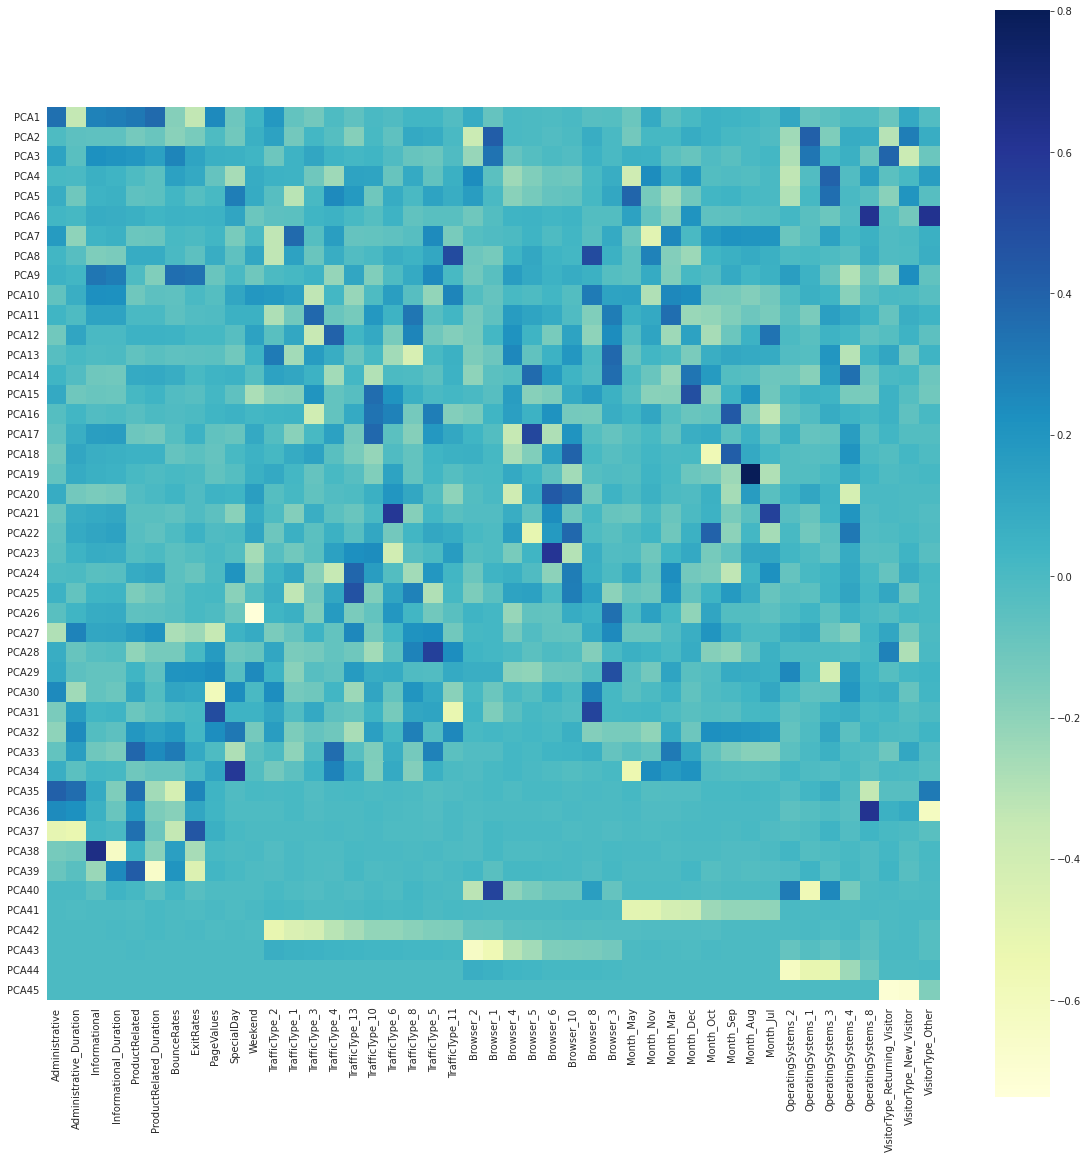

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(X.columns))
ax.set_aspect("equal")
plt.savefig('PCA Heatmap.jpeg',bbox_inches='tight',dpi=150)

#Building Model Using PCA components that explain 95% variance of the data

In [ ]:
X=df_final.drop(columns=['Revenue'],axis=1)
y=df_final['Revenue']
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs_pca=ss.fit_transform(X)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(Xs_pca)
X_pca.shape

(12330, 33)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_pca=DecisionTreeClassifier(criterion='entropy',random_state=0)

from sklearn.linear_model import LogisticRegression
LR_pca=LogisticRegression()

from sklearn.naive_bayes import GaussianNB
nb_pca=GaussianNB()

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc_pca=RandomForestClassifier(n_estimators=100,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn_pca=KNeighborsClassifier()

from sklearn.ensemble import AdaBoostClassifier
ada_pca=AdaBoostClassifier(random_state=0)

import lightgbm as lgb
lgbm_pca=lgb.LGBMClassifier(random_state=0)

from xgboost import XGBClassifier
xgb_pca=XGBClassifier(random_state=0)

from sklearn import svm
svc_pca=svm.SVC(random_state=0)

#Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

pca_rfc_tunned=RandomForestClassifier(n_estimators=100,random_state=0)
params={'n_estimators':sp_randint(1,100),
        'max_features':sp_randint(1,33),
        'max_depth': sp_randint(2,10),
        'min_samples_split':sp_randint(2,20),
        'min_samples_leaf':sp_randint(1,20),
        'criterion':['gini','entropy']}

rsearch_rfc_pca=RandomizedSearchCV(pca_rfc_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)

rsearch_rfc_pca.fit(X_pca,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51b78cc510>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51b78cc210>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51b78cc150>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51b78cc390>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51a9a67590>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_rfc_pca.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 25,
 'min_samples_leaf': 18,
 'min_samples_split': 7,
 'n_estimators': 26}

In [ ]:
pca_rfc_tunned=RandomForestClassifier(**rsearch_rfc_pca.best_params_,random_state=0)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

pca_knn_tunned=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,50),'p':sp_randint(1,5)}

rsearch_knn_pca=RandomizedSearchCV(pca_knn_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)
rsearch_knn_pca.fit(X_pca,y)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51ae180110>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51b820c210>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_knn_pca.best_params_

{'n_neighbors': 45, 'p': 4}

In [ ]:
pca_knn_tunned=KNeighborsClassifier(**rsearch_knn_pca.best_params_)

In [ ]:
#Hyperparameter Tuning of LGBM
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform 

pca_lgbm_tunned=lgb.LGBMClassifier(random_state=0)
params={'n_estimators':sp_randint(5,200),
       'max_depth': sp_randint(2,25),
        'learning_rate':sp_uniform(0.001,0.05),
        'num_leaves':sp_randint(2,60)
       }

rsearch_lgbm_pca=RandomizedSearchCV(pca_lgbm_tunned,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_lgbm_pca.fit(X_pca,y)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=0), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aef51350>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51ae186bd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51ae186210>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aef510d0>},
                   random_state=0)

In [ ]:
rsearch_lgbm_pca.best_params_

{'learning_rate': 0.046836147700973045,
 'max_depth': 3,
 'n_estimators': 41,
 'num_leaves': 12}

In [ ]:
pca_lgbm_tunned=lgb.LGBMClassifier(**rsearch_lgbm_pca.best_params_,random_state=0)

In [ ]:
#Hyperparameter Tuning of XGB
XGB_tunned_pca=XGBClassifier(random_state=0)
params = {
        'min_child_weight': sp_randint(1,20),
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': sp_randint(2,10)
        }

rsearch_xgb_pca=RandomizedSearchCV(XGB_tunned_pca,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_xgb_pca.fit(X_pca,y)

RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51b78c0950>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51b78c00d0>,
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=0)

In [ ]:
rsearch_xgb_pca.best_params_

{'colsample_bytree': 0.6,
 'gamma': 5,
 'max_depth': 2,
 'min_child_weight': 15,
 'subsample': 0.6}

In [ ]:
XGB_tunned_pca=XGBClassifier(**rsearch_xgb_pca.best_params_,random_state=0)

#svc

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn import svm
SVM_tunned_pca=svm.SVC(random_state=0)
params = {'C': [0.1, 1, 10, 100, 1000], 
          'degree': sp_randint(0,20),
          'gamma': sp_uniform(0.1,0.5), 
          'kernel': ['rbf']} 

rsearch_svm_pca=RandomizedSearchCV(SVM_tunned_pca,param_distributions=params,cv=3,n_iter=20,n_jobs=-1,random_state=0)

rsearch_svm_pca.fit(X_pca,y)

RandomizedSearchCV(cv=3, estimator=SVC(random_state=0), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aeac3450>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aeac3290>,
                                        'kernel': ['rbf']},
                   random_state=0)

In [ ]:
rsearch_svm_pca.best_params_

{'C': 0.1, 'degree': 12, 'gamma': 0.2917207594128889, 'kernel': 'rbf'}

In [ ]:
SVM_tunned_pca=svm.SVC(**rsearch_svm_pca.best_params_,random_state=0)

#Stacking

In [ ]:
from sklearn.ensemble import VotingClassifier
#hard_voting_pca=VotingClassifier(estimators=[('Logistic',LR),('Random Forest Tunned',rfc_tunned),('LGBM Tunned',lgbm_tunned)],voting='hard',flatten_transform=False)

soft_voting_pca=VotingClassifier(estimators=[('Logistic',LR_pca),('Random Forest Tunned',pca_rfc_tunned),('LGBM Tunned',pca_lgbm_tunned)],voting='soft')

weighted_soft_pca=VotingClassifier(estimators=[('Logistic',LR_pca),('Random Forest Tunned',pca_rfc_tunned),('LGBM Tunned',pca_lgbm_tunned)],weights=[3,1,2],voting='soft')
#weighted_hard_pca=VotingClassifier(estimators=[('Logistic',LR),('Random Forest Tunned',rfc_tunned),('LGBM Tunned',lgbm_tunned)],weights=[3,1,2],voting='hard',flatten_transform=False)
models_pca=[]
models_pca.append(('Logistic',LR_pca))
models_pca.append(('Decision Tree',dt_pca))
models_pca.append(('Naive Bayes',nb_pca))
models_pca.append(('Random Forest',rfc_pca))
models_pca.append(('Random Forest Tuned',pca_rfc_tunned))
models_pca.append(('KNN',knn_pca))
models_pca.append(('KNN Tuned',pca_knn_tunned))
models_pca.append(('Ada-Boost',ada_pca))
models_pca.append(('LGBM',lgbm_pca))
models_pca.append(('LGBM Tuned',pca_lgbm_tunned))
#models_pca.append(('Hard Voting',hard_voting_pca))
#models_pca.append(('Weighted Hard Voting',weighted_hard_pca))
models_pca.append(('Soft Voting',soft_voting_pca))
models_pca.append(('Weighted Soft Voting',weighted_soft_pca))
models_pca.append(('XG Boost',xgb_pca))
models_pca.append(('XG Boost Tuned',XGB_tunned_pca))
models_pca.append(('SVM',svc_pca))
models_pca.append(('SVM Tuned',SVM_tunned_pca))
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split

results_pca=[]
acc_score_pca=[]
auc_score_pca=[]
bias_pca=[]
f1_score_pca=[]
precision_score_pca=[]
recall_score_pca=[]
names_pca=[]
for name,model in models_pca:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X_pca,y,cv=kfold,scoring='roc_auc')
    results_pca.append(cv_results)
    bias_pca.append(np.var(cv_results,ddof=1))
    auc_score_pca.append(np.mean(cv_results))
    f1=model_selection.cross_val_score(model,X_pca,y,cv=kfold,scoring='f1_weighted')
    f1_score_pca.append(np.mean(f1))
    
    acc=model_selection.cross_val_score(model,X_pca,y,cv=kfold,scoring='accuracy')
    acc_score_pca.append(np.mean(acc))
    
    p=model_selection.cross_val_score(model,X_pca,y,cv=kfold,scoring='precision_weighted')
    precision_score_pca.append(np.mean(p))
    
    r=model_selection.cross_val_score(model,X_pca,y,cv=kfold,scoring='recall_weighted')
    recall_score_pca.append(np.mean(r))
    
    names_pca.append(name)

result_pca_df=pd.DataFrame({'Model':names_pca,
                           'Accuracy Score':acc_score_pca,
                            'ROC-AUC Score':auc_score_pca,
                            'Variance Error':bias_pca,
                            'F1 Score':f1_score_pca,
                            'Precision Score':precision_score_pca,
                            'Recall Score':recall_score_pca})


In [ ]:
# Model Results of PCA components
result_pca_df

,Model,Accuracy Score,ROC-AUC Score,Variance Error,F1 Score,Precision Score,Recall Score
0,Logistic,0.893998,0.911392,0.000085,0.890850,0.889201,0.893998
1,Decision Tree,0.857421,0.732587,0.000471,0.857963,0.858914,0.857421
2,Naive Bayes,0.861800,0.877820,0.000130,0.861877,0.862281,0.861800
3,Random Forest,0.891971,0.913437,0.000062,0.883386,0.883033,0.891971
4,Random Forest Tuned,0.891646,0.918008,0.000049,0.885014,0.883366,0.891646
5,KNN,0.870803,0.834080,0.000145,0.857626,0.855375,0.870803
6,KNN Tuned,0.856610,0.878290,0.000070,0.813318,0.836228,0.856610
7,Ada-Boost,0.887105,0.905667,0.000084,0.881770,0.879561,0.887105
8,LGBM,0.894566,0.919012,0.000044,0.889693,0.888050,0.894566
9,LGBM Tuned,0.883293,0.904993,0.000074,0.869752,0.871289,0.883293


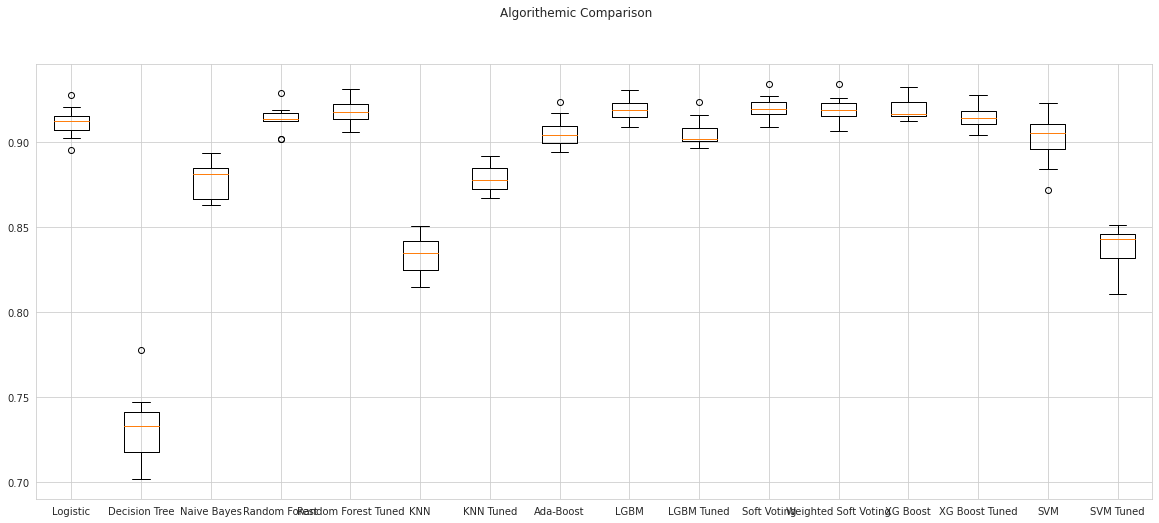

In [ ]:
#Model Comparison
fig=plt.figure(figsize=(20,8))
fig.suptitle('Algorithemic Comparison')
ax=fig.add_subplot(111)

plt.boxplot(results_pca)
ax.set_xticklabels(names_pca)
plt.show()

#Modelling without PCA

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tools import add_constant
df_constant = add_constant(df_final)
df_constant.head() 

,const,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,TrafficType_2,TrafficType_1,TrafficType_3,TrafficType_4,TrafficType_13,TrafficType_10,TrafficType_6,TrafficType_8,TrafficType_5,TrafficType_11,Browser_2,Browser_1,Browser_4,Browser_5,Browser_6,Browser_10,Browser_8,Browser_3,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Oct,Month_Sep,Month_Aug,Month_Jul,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,OperatingSystems_8,VisitorType_Returning_Visitor,VisitorType_New_Visitor,VisitorType_Other
0,1.0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1.0,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1.0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1.0,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1.0,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
X=df_final.drop(columns=['Revenue','ExitRates'],axis=1)
y=df_final['Revenue']
X=X.astype(float)

Xc=sm.add_constant(X)

In [ ]:
model = sm.Logit(y,Xc)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.245505
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12286
Method:                           MLE   Df Model:                           43
Date:                Sat, 22 Jan 2022   Pseudo R-squ.:                  0.4302
Time:                        05:49:48   Log-Likelihood:                -3027.1
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.7208   2.41e+06  -1.13e-06      1.000   -4.72e+06    4.72e+06
Administrative                   -0.0833      0.012     -6.774      0.000      -0.107      -0.059
Administrative_Duration           0.0115      0.097      0.119      0.905      -0.178       0.201
Informational                    -0.0001      0.034     -0.004      0.997      -0.066       0.066
Informational_Duration           -0.0382      0.131     -0.293      0.770      -0.294       0.218
ProductRelated                    0.0016      0.001      1.669      0.095      -0.000       0.004
ProductRelated_Duration           0.0154      0.009      1.684      0.092      -0.003       0.033
BounceRates                      -1.3916      0.185     -7.522      0.000      -1.754      -1.029
PageValues                        5.7497      0.126     45.485      0.000       5.502       5.997
SpecialDay                       -0.2653      0.250     -1.063      0.288      -0.754       0.224
Weekend                           0.0624      0.078      0.799      0.425      -0.091       0.215
TrafficType_2                    -0.1198      0.212     -0.564      0.573      -0.536       0.296
TrafficType_1                    -0.5304      0.223     -2.382      0.017      -0.967      -0.094
TrafficType_3                    -0.4867      0.229     -2.123      0.034      -0.936      -0.037
TrafficType_4                    -0.2419      0.238     -1.016      0.310      -0.709       0.225
TrafficType_13                   -0.8571      0.281     -3.048      0.002      -1.408      -0.306
TrafficType_10                    0.0357      0.264      0.135      0.892      -0.481       0.553
TrafficType_6                    -0.4316      0.279     -1.549      0.121      -0.978       0.115
TrafficType_8                     0.3692      0.271      1.362      0.173      -0.162       0.900
TrafficType_5                     0.0959      0.300      0.319      0.749      -0.492       0.684
TrafficType_11                    0.1160      0.304      0.381      0.703      -0.480       0.712
Browser_2                        -0.3056      0.388     -0.787      0.431      -1.067       0.456
Browser_1                        -0.2356      0.426     -0.553      0.580      -1.071       0.600
Browser_4                        -0.3364      0.410     -0.821      0.411      -1.139       0.466
Browser_5                        -0.0853      0.421     -0.203      0.839      -0.911       0.740
Browser_6                        -0.9778      0.490     -1.996      0.046      -1.938      -0.018
Browser_10                       -0.0215      0.471     -0.046      0.964      -0.945       0.902
Browser_8                         0.0944      0.543      0.174      0.862      -0.971       1.160
Browser_3                        -0.9080      0.642     -1.415      0.157      -2.166       0.350
Month_May                        -0.1603      0.238     -0.673      0.501      -0.628       0.307
Month_N

##Feature Selection 

In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE) 

['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'PageValues', 'TrafficType_1', 'TrafficType_3', 'TrafficType_13', 'TrafficType_6', 'TrafficType_8', 'Browser_6', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'Month_Aug', 'Month_Jul', 'VisitorType_New_Visitor']


In [ ]:
len(selected_features_BE)

18

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12286
Method:                           MLE   Df Model:                           43
Date:                Sat, 22 Jan 2022   Pseudo R-squ.:                  0.4302
Time:                        05:50:21   Log-Likelihood:                -3027.1
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.7208   2.41e+06  -1.13e-06      1.000   -4.72e+06    4.72e+06
Administrative                   -0.0833      0.012     -6.774      0.000      -0.107      -0.059
Administrative_Duration           0.0115      0.097      0.119      0.905      -0.178       0.201
Informational                    -0.0001      0.034     -0.004      0.997      -0.066       0.066
Informational_Duration           -0.0382      0.131     -0.293      0.770      -0.294       0.218
ProductRelated                    0.0016      0.001      1.669      0.095      -0.000       0.004
ProductRelated_Duration           0.0154      0.009      1.684      0.092      -0.003       0.033
BounceRates                      -1.3916      0.185     -7.522      0.000      -1.754      -1.029
PageValues                        5.7497      0.126     45.485      0.000       5.502       5.997
SpecialDay                       -0.2653      0.250     -1.063      0.288      -0.754       0.224
Weekend                           0.0624      0.078      0.799      0.425      -0.091       0.215
TrafficType_2                    -0.1198      0.212     -0.564      0.573      -0.536       0.296
TrafficType_1                    -0.5304      0.223     -2.382      0.017      -0.967      -0.094
TrafficType_3                    -0.4867      0.229     -2.123      0.034      -0.936      -0.037
TrafficType_4                    -0.2419      0.238     -1.016      0.310      -0.709       0.225
TrafficType_13                   -0.8571      0.281     -3.048      0.002      -1.408      -0.306
TrafficType_10                    0.0357      0.264      0.135      0.892      -0.481       0.553
TrafficType_6                    -0.4316      0.279     -1.549      0.121      -0.978       0.115
TrafficType_8                     0.3692      0.271      1.362      0.173      -0.162       0.900
TrafficType_5                     0.0959      0.300      0.319      0.749      -0.492       0.684
TrafficType_11                    0.1160      0.304      0.381      0.703      -0.480       0.712
Browser_2                        -0.3056      0.388     -0.787      0.431      -1.067       0.456
Browser_1                        -0.2356      0.426     -0.553      0.580      -1.071       0.600
Browser_4                        -0.3364      0.410     -0.821      0.411      -1.139       0.466
Browser_5                        -0.0853      0.421     -0.203      0.839      -0.911       0.740
Browser_6                        -0.9778      0.490     -1.996      0.046      -1.938      -0.018
Browser_10                       -0.0215      0.471     -0.046      0.964      -0.945       0.902
Browser_8                         0.0944      0.543      0.174      0.862      -0.971       1.160
Browser_3                        -0.9080      0.642     -1.415      0.157      -2.166       0.350
Month_May                        -0.1603      0.238     -0.673      0.501      -0.628       0.307
Month_N

##Model Using Selected features

In [ ]:
X=df_final[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'PageValues', 'TrafficType_1', 
            'TrafficType_3', 'TrafficType_13', 'TrafficType_6', 'TrafficType_8', 'Browser_6', 'Month_May', 'Month_Nov', 
            'Month_Oct', 'Month_Sep', 'Month_Aug', 'Month_Jul', 'VisitorType_New_Visitor']]
X.head()

,Administrative,Informational,ProductRelated,BounceRates,PageValues,TrafficType_1,TrafficType_3,TrafficType_13,TrafficType_6,TrafficType_8,Browser_6,Month_May,Month_Nov,Month_Oct,Month_Sep,Month_Aug,Month_Jul,VisitorType_New_Visitor
0,0,0,1,0.724780,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.724780,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0.549280,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,10,0.457305,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(12330, 18)

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,log_loss,f1_score
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs=ss.fit_transform(X)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
ada=AdaBoostClassifier(random_state=0)
gb=GradientBoostingClassifier(random_state=0)
bc=BaggingClassifier(random_state=0)

import lightgbm as lgb
lgbm=lgb.LGBMClassifier(random_state=0)

from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=0)

from sklearn import svm
svc=svm.SVC(random_state=0)

##Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc_tunned=RandomForestClassifier(n_estimators=100,random_state=0)
params={'n_estimators':sp_randint(1,200),
        'max_features':sp_randint(1,18),
        'max_depth': sp_randint(2,20),
        'min_samples_split':sp_randint(2,40),
        'min_samples_leaf':sp_randint(1,30),
        'criterion':['gini','entropy']}

rsearch_rfc=RandomizedSearchCV(rfc_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)

rsearch_rfc.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aeda90d0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51adf7b950>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51ae98ad50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aeda9390>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51adf7be90>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'max_features': 6,
 'min_samples_leaf': 26,
 'min_samples_split': 15,
 'n_estimators': 73}

In [ ]:
rfc_tunned=RandomForestClassifier(**rsearch_rfc.best_params_,random_state=0)

Hyperparameter Tuning of KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

knn_tunned=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,40),'p':sp_randint(1,10)}

rsearch_knn=RandomizedSearchCV(knn_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)
rsearch_knn.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51ae1715d0>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51ae1712d0>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_knn.best_params_

{'n_neighbors': 39, 'p': 8}

In [ ]:
knn_tunned=KNeighborsClassifier(**rsearch_knn.best_params_)

Hyperparameter Tuning of LGBM

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform 

lgbm_tunned=lgb.LGBMClassifier(random_state=0)
params={'n_estimators':sp_randint(2,200),
       'max_depth': sp_randint(2,30),
        'learning_rate':sp_uniform(0.001,0.05),
        'num_leaves':sp_randint(2,50)
       }

rsearch_lgbm=RandomizedSearchCV(lgbm_tunned,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_lgbm.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=0), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51ae0cfad0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51ae38f710>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51ae38f590>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51ae38f0d0>},
                   random_state=0)

In [ ]:
rsearch_lgbm.best_params_

{'learning_rate': 0.019405120099076707,
 'max_depth': 14,
 'n_estimators': 92,
 'num_leaves': 12}

In [ ]:
lgbm_tunned=lgb.LGBMClassifier(**rsearch_lgbm.best_params_,random_state=0)

Hyperparameter Tuning of XGB

In [ ]:
XGB_tunned=XGBClassifier(random_state=0)
params = {
        'min_child_weight': sp_randint(2,10),
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': sp_randint(2,10)
        }

rsearch_xgb=RandomizedSearchCV(XGB_tunned,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_xgb.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aec2c190>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aec2cf10>,
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=0)

In [ ]:
rsearch_xgb.best_params_

{'colsample_bytree': 1.0,
 'gamma': 2,
 'max_depth': 2,
 'min_child_weight': 5,
 'subsample': 1.0}

In [ ]:
XGB_tunned=XGBClassifier(**rsearch_xgb.best_params_,random_state=0)

Hyperparameter Tuning of SVC

In [ ]:
from sklearn import svm
SVM_tunned=svm.SVC(random_state=0)
params = {'C': [0.1, 1, 10, 100, 1000], 
          'degree': sp_randint(1,15),
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
          'kernel': ['rbf']} 

rsearch_svm=RandomizedSearchCV(SVM_tunned,param_distributions=params,cv=3,n_iter=20,n_jobs=-1,random_state=0)

rsearch_svm.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=SVC(random_state=0), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51ae087590>,
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   random_state=0)

In [ ]:
rsearch_svm.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
SVM_tunned=svm.SVC(**rsearch_svm.best_params_,random_state=0)

Stacking

In [ ]:
from sklearn.ensemble import VotingClassifier

soft_voting=VotingClassifier(estimators=[('Logistic',LR),('Random Forest Tunned',rfc_tunned),('LGBM Tunned',lgbm_tunned)],voting='soft')

weighted_soft=VotingClassifier(estimators=[('Logistic',LR),('Random Forest Tunned',rfc_tunned),('LGBM Tunned',lgbm_tunned)],weights=[3,1,2],voting='soft')

In [ ]:
models_a=[]
models_a.append(('Logistic',LR))
models_a.append(('Decision Tree',dt))
models_a.append(('Naive Bayes',nb))
models_a.append(('Random Forest',rfc))
models_a.append(('Random Forest Tuned',rfc_tunned))
models_a.append(('KNN',knn))
models_a.append(('KNN Tuned',knn_tunned))
models_a.append(('Bagging',bc))
models_a.append(('Ada-Boost',ada))
models_a.append(('Gradient Boost',gb))
models_a.append(('LGBM',lgbm))
models_a.append(('LGBM Tunned',lgbm_tunned))
models_a.append(('Soft Voting',soft_voting))
models_a.append(('Weighted Soft Voting',weighted_soft))
models_a.append(('XG Boost',xgb))
models_a.append(('XG Boost Tuned',XGB_tunned))
models_a.append(('SVM',svc))
models_a.append(('SVM Tuned',SVM_tunned))
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split

results_a=[]
acc_score_a=[]
auc_score_a=[]
bias_a=[]
f1_score_a=[]
precision_score_a=[]
recall_score_a=[]
names_a=[]
for name,model in models_a:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,Xs,y,cv=kfold,scoring='roc_auc')
    results_a.append(cv_results)
    bias_a.append(np.var(cv_results,ddof=1))
    auc_score_a.append(np.mean(cv_results))
    
    f1=model_selection.cross_val_score(model,Xs,y,cv=kfold,scoring='f1_weighted')
    f1_score_a.append(np.mean(f1))
    
    acc=model_selection.cross_val_score(model,Xs,y,cv=kfold,scoring='accuracy')
    acc_score_a.append(np.mean(acc))
    
    p=model_selection.cross_val_score(model,Xs,y,cv=kfold,scoring='precision_weighted')
    precision_score_a.append(np.mean(p))
    
    r=model_selection.cross_val_score(model,Xs,y,cv=kfold,scoring='recall_weighted')
    recall_score_a.append(np.mean(r))
    
    names_a.append(name)
    
result_df=pd.DataFrame({'Model':names_a,
                        'Accuracy Score':acc_score_a,
                        'ROC-AUC Score':auc_score_a,
                        'Variance Error':bias_a,
                        'F1 Score':f1_score_a,
                        'Precision Score':precision_score_a,
                        'Recall Score':recall_score_a})

Model Results

In [ ]:
result_df

,Model,Accuracy Score,ROC-AUC Score,Variance Error,F1 Score,Precision Score,Recall Score
0,Logistic,0.898135,0.914117,0.000088,0.895310,0.893921,0.898135
1,Decision Tree,0.865207,0.743601,0.000494,0.865421,0.865911,0.865207
2,Naive Bayes,0.831955,0.849016,0.000146,0.845702,0.872921,0.831955
3,Random Forest,0.894161,0.914730,0.000060,0.890055,0.888262,0.894161
4,Random Forest Tuned,0.904380,0.932590,0.000029,0.900687,0.899430,0.904380
5,KNN,0.886456,0.873540,0.000097,0.882761,0.880820,0.886456
6,KNN Tuned,0.890916,0.915635,0.000063,0.882764,0.882024,0.890916
7,Bagging,0.884185,0.886422,0.000098,0.879164,0.876871,0.884185
8,Ada-Boost,0.891646,0.917153,0.000045,0.887909,0.886174,0.891646
9,Gradient Boost,0.899919,0.930498,0.000049,0.896398,0.894996,0.899919


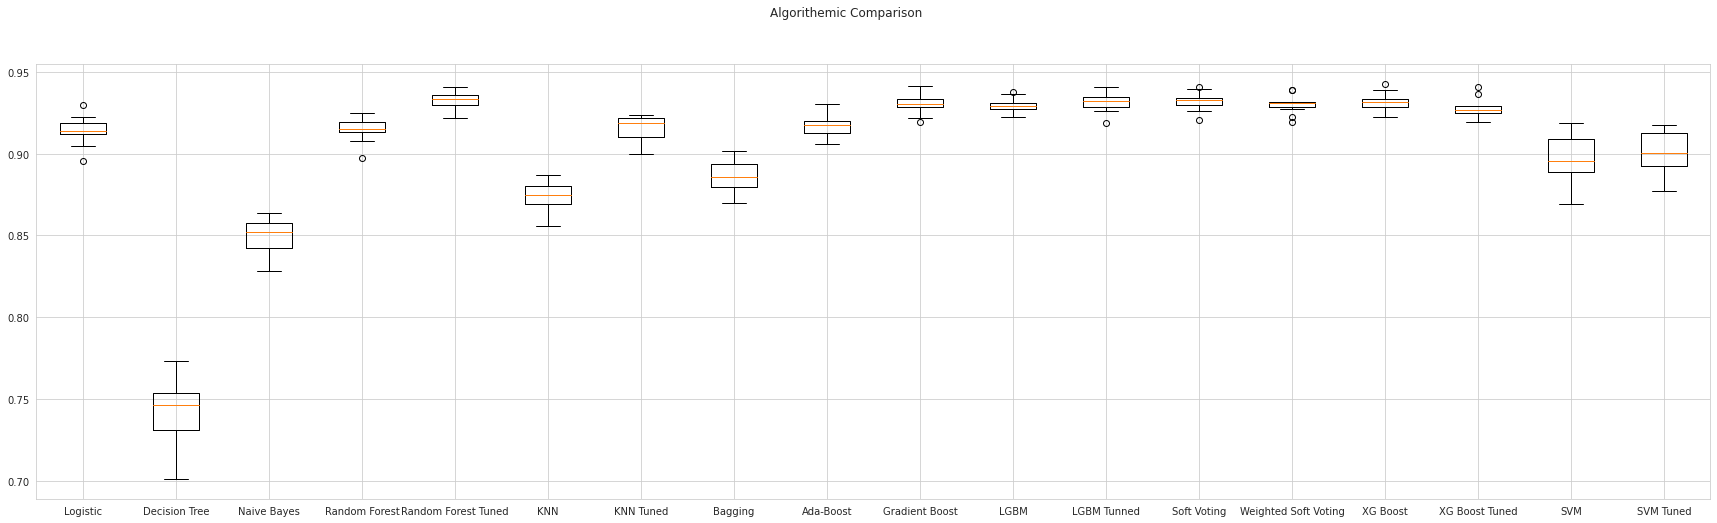

In [ ]:
fig=plt.figure(figsize=(30,8))
fig.suptitle('Algorithemic Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results_a)
ax.set_xticklabels(names_a)
plt.show()

##SMOTE

In [ ]:
X=df_final[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'PageValues', 'TrafficType_1', 
            'TrafficType_3', 'TrafficType_13', 'TrafficType_6', 'TrafficType_8', 'Browser_6', 'Month_May', 'Month_Nov', 
            'Month_Oct', 'Month_Sep', 'Month_Aug', 'Month_Jul', 'VisitorType_New_Visitor']]
X.head()

,Administrative,Informational,ProductRelated,BounceRates,PageValues,TrafficType_1,TrafficType_3,TrafficType_13,TrafficType_6,TrafficType_8,Browser_6,Month_May,Month_Nov,Month_Oct,Month_Sep,Month_Aug,Month_Jul,VisitorType_New_Visitor
0,0,0,1,0.724780,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.724780,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0.549280,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,10,0.457305,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.shape,X_test.shape)

(8631, 18) (3699, 18)


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=3)

X_train_sm,y_train_sm=smote.fit_resample(X_train,y_train)


In [ ]:
pd.Series(y_train).value_counts() #Target before smote


0    7281
1    1350
Name: Revenue, dtype: int64

In [ ]:
pd.Series(y_train_sm).value_counts() #target After Smote

1    7281
0    7281
Name: Revenue, dtype: int64

#Model After SMOTE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_sm=DecisionTreeClassifier(criterion='entropy',random_state=0)

from sklearn.linear_model import LogisticRegression
LR_sm=LogisticRegression()

from sklearn.naive_bayes import GaussianNB
nb_sm=GaussianNB()

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc_sm=RandomForestClassifier(n_estimators=100,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn_sm=KNeighborsClassifier(n_neighbors=6)

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
ada_sm=AdaBoostClassifier(random_state=0)
gb_sm=GradientBoostingClassifier(random_state=0)
bc_sm=BaggingClassifier(random_state=0)

import lightgbm as lgb
lgbm_sm=lgb.LGBMClassifier(random_state=0)

from xgboost import XGBClassifier
xgb_sm=XGBClassifier(random_state=0)

from sklearn import svm
svc_sm=svm.SVC(random_state=0,probability=True)

Hyperparameter Tuning of Random Fores

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

sm_rfc_tunned=RandomForestClassifier(n_estimators=100,random_state=0)
params={'n_estimators':sp_randint(1,1200),
        'max_features':sp_randint(1,18),
        'max_depth': sp_randint(1,60),
        'min_samples_split':sp_randint(2,40),
        'min_samples_leaf':sp_randint(2,20),
        'criterion':['gini','entropy']}

rsearch_rfc_sm=RandomizedSearchCV(sm_rfc_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)

rsearch_rfc_sm.fit(X_train_sm,y_train_sm)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aeb0ea90>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aeb0e950>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aeb0e2d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aedeb210>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aeb0efd0>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_rfc_sm.best_params_

{'criterion': 'entropy',
 'max_depth': 29,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1078}

In [ ]:
sm_rfc_tunned=RandomForestClassifier(**rsearch_rfc_sm.best_params_,random_state=0)

Hyperparameter Tuning of KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

sm_knn_tunned=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,150),'p':sp_randint(1,70)}

rsearch_knn_sm=RandomizedSearchCV(sm_knn_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)
rsearch_knn_sm.fit(X_train_sm,y_train_sm)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aeae8610>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aeae8c90>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_knn_sm.best_params_

{'n_neighbors': 26, 'p': 10}

In [ ]:
sm_knn_tunned=KNeighborsClassifier(**rsearch_knn_sm.best_params_)

Hyperparameter Tuning of LGBM

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform 

sm_lgbm_tunned=lgb.LGBMClassifier(random_state=0)
params={'n_estimators':sp_randint(1,500),
       'max_depth': sp_randint(2,20),
        'learning_rate':sp_uniform(0.001,0.05),
        'num_leaves':sp_randint(10,70)
       }

rsearch_lgbm_sm=RandomizedSearchCV(sm_lgbm_tunned,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_lgbm_sm.fit(X_train_sm,y_train_sm)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=0), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51a96e3e90>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51ae1da1d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aedfacd0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f51aedfae50>},
                   random_state=0)

In [ ]:
rsearch_lgbm_sm.best_params_

{'learning_rate': 0.046836350966509094,
 'max_depth': 16,
 'n_estimators': 499,
 'num_leaves': 53}

In [ ]:
sm_lgbm_tunned=lgb.LGBMClassifier(**rsearch_lgbm_sm.best_params_,random_state=0)

Hyperparameter Tuning of XGB

In [ ]:
XGB_tunned_sm=XGBClassifier(random_state=0)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

rsearch_xgb_sm=RandomizedSearchCV(XGB_tunned_sm,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_xgb_sm.fit(X_train_sm,y_train_sm)

RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=0)

In [ ]:
rsearch_xgb_sm.best_params_

{'colsample_bytree': 0.6,
 'gamma': 2,
 'max_depth': 5,
 'min_child_weight': 10,
 'subsample': 1.0}

In [ ]:
XGB_tunned_sm=XGBClassifier(**rsearch_xgb_sm.best_params_,random_state=0)

Hyperparameter Tuning of SVC

In [ ]:
from sklearn import svm
SVM_tunned_sm=svm.SVC(random_state=0,probability=True)
params = {'C': [0.1, 1, 10, 100, 1000], 
          'degree': [0, 1, 2, 3, 4, 5, 6],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
          'kernel': ['rbf']} 

rsearch_svm_sm=RandomizedSearchCV(SVM_tunned_sm,param_distributions=params,cv=3,n_iter=20,n_jobs=-1,random_state=0)

rsearch_svm_sm.fit(X_train_sm,y_train_sm)
rsearch_svm_sm.best_params_
SVM_tunned_sm=svm.SVC(**rsearch_svm_sm.best_params_,random_state=0,probability=True)

In [ ]:
from sklearn.ensemble import VotingClassifier

soft_voting_sm=VotingClassifier(estimators=[('Bagging',bc_sm),('LGBM Tunned ',lgbm_sm),('Random Forest Tunned',rfc_sm)],voting='soft')

weighted_soft_sm=VotingClassifier(estimators=[('Bagging',bc_sm),('LGBM Tunned ',lgbm_sm),('Random Forest Tunned',rfc_sm)],weights=[3,1,2],voting='soft')
models_sm=[]
models_sm.append(('Logistic',LR_sm))
models_sm.append(('Decision Tree',dt_sm))
models_sm.append(('Naive Bayes',nb_sm))
models_sm.append(('Random Forest',rfc_sm))
models_sm.append(('Random Forest Tuned',sm_rfc_tunned))
models_sm.append(('KNN',knn_sm))
models_sm.append(('KNN Tuned',sm_knn_tunned))
models_sm.append(('Bagging',bc_sm))
models_sm.append(('Ada-Boost',ada_sm))
models_sm.append(('Gradient Boost',gb_sm))
models_sm.append(('LGBM',lgbm_sm))
models_sm.append(('LGBM Tuned',sm_lgbm_tunned))
models_sm.append(('Soft Voting',soft_voting_sm))
models_sm.append(('Weighted Soft Voting',weighted_soft_sm))
models_sm.append(('XGB',xgb_sm))
models_sm.append(('XGB Tuned',XGB_tunned_sm))
models_sm.append(('SVM',svc_sm))
models_sm.append(('SVM Tuned',SVM_tunned_sm))

In [ ]:
X_train_sm=np.array(X_train_sm)
y_train_sm=np.array(y_train_sm) 
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
acc_train_sm=[]
auc_train_sm=[]

acc_test_sm=[]
auc_test_sm=[]
names_sm=[]
def model_eval(name,algo, Xtrain,ytrain,Xtest,ytest):
    names_sm.append(name)    
    
    algo.fit(Xtrain,ytrain)
    ytrain_pred =algo.predict(Xtrain)
    ytrain_prob = algo.predict_proba(Xtrain)[:,1]

    acc_train_sm.append(accuracy_score(ytrain, ytrain_pred))
    auc_train_sm.append(roc_auc_score(ytrain, ytrain_prob))

    ytest_pred = algo.predict(Xtest)
    ytest_prob = algo.predict_proba(Xtest)[:,1]

    acc_test_sm.append(accuracy_score(ytest, ytest_pred))
    auc_test_sm.append(roc_auc_score(ytest, ytest_prob))

In [ ]:
for name,algo in models_sm:
    model_eval(name,algo,X_train_sm,y_train_sm,X_test,y_test)
result_sm_df=pd.DataFrame({'Model':names_sm,
                           
                           'Accuracy Score Train':acc_train_sm,
                           'ROC-AUC Score Train':auc_train_sm,
                           
                           'Accuracy Score Test':acc_test_sm,
                           'ROC-AUC Score Test':auc_test_sm
                            })

SMOTE Model Results

In [ ]:
result_sm_df

,Model,Accuracy Score Train,ROC-AUC Score Train,Accuracy Score Test,ROC-AUC Score Test
0,Logistic,0.876803,0.939356,0.885374,0.895804
1,Decision Tree,0.994850,0.999935,0.856177,0.778899
2,Naive Bayes,0.743648,0.879531,0.599892,0.707088
3,Random Forest,0.994850,0.999767,0.881590,0.917720
4,Random Forest Tuned,0.958797,0.995343,0.888348,0.924423
5,KNN,0.891361,0.970971,0.730197,0.756761
6,KNN Tuned,0.797349,0.908562,0.654501,0.776579
7,Bagging,0.990455,0.999436,0.868613,0.894656
8,Ada-Boost,0.908804,0.960594,0.888619,0.893660
9,Gradient Boost,0.917044,0.972759,0.890241,0.922272


In [ ]:
def model_graph(name,algo, Xtrain,ytrain,Xtest,ytest):   
    
    algo.fit(Xtrain,ytrain)
    ytrain_pred =algo.predict(Xtrain)
    ytrain_prob = algo.predict_proba(Xtrain)[:,1]

    acc_train_sm.append(accuracy_score(ytrain, ytrain_pred))
    auc_train_sm.append(roc_auc_score(ytrain, ytrain_prob))

    ytest_pred = algo.predict(Xtest)
    ytest_prob = algo.predict_proba(Xtest)[:,1]

    acc_test_sm.append(accuracy_score(ytest, ytest_pred))
    auc_test_sm.append(roc_auc_score(ytest, ytest_prob))


    fpr,tpr,th=roc_curve(ytest, ytest_prob)
    
    plt.plot(fpr,tpr,label=name)
    plt.plot(fpr,fpr)
    plt.legend(loc="lower right")

plt.show()

Comparison of Top 4 best performing Models

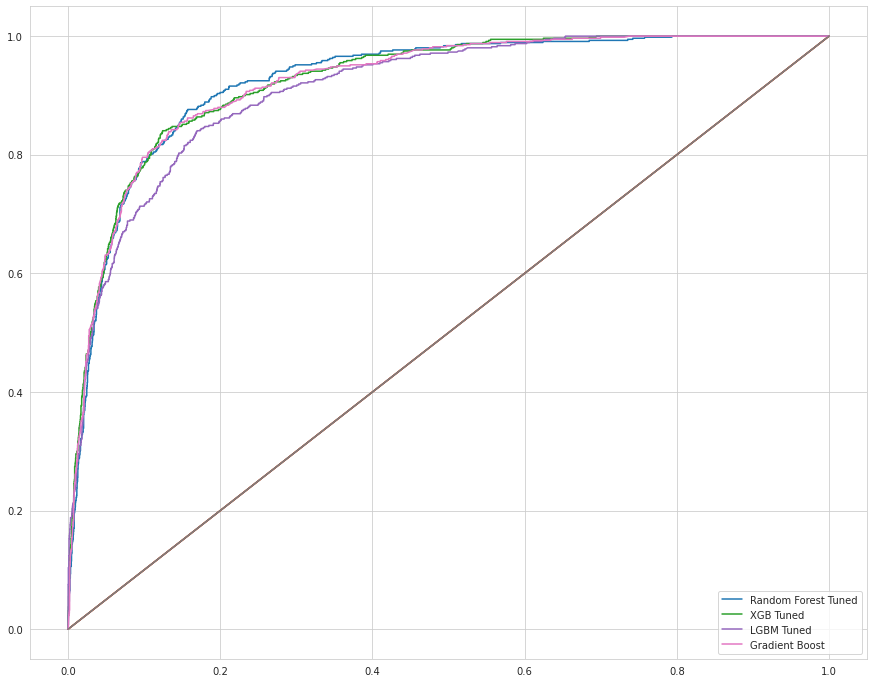

In [ ]:
plt.figure(figsize=(15,12))
model_sm_final=[('Random Forest Tuned',sm_rfc_tunned),('XGB Tuned',XGB_tunned_sm),
                ('LGBM Tuned',sm_lgbm_tunned),('Gradient Boost',gb_sm)]
for name,algo in model_sm_final:
    model_graph(name,algo,X_train_sm,y_train_sm,X_test,y_test)